# OpenET DisALEXI
## Image Class Property/Method Example
This example shows how to instantiate the model Image class for a single Landsat image using the ".from_landsat_c1_sr()" helper method.  This example also shows how to get the model variables.

In [1]:
import pprint

import ee

from IPython.display import Image
import openet.disalexi as model

In [2]:
ee.Initialize()

### Inputs

In [3]:
landsat_img = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_044033_20170801')
#landsat_img = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_038031_20130828')
#landsat_img = ee.Image('LANDSAT/LE07/C02/T1_L2/LE07_043033_20110903')

image_crs = landsat_img.select('SR_B2').projection().crs().getInfo()
image_transform = landsat_img.select('SR_B2').projection().getInfo()['transform']
image_geom = landsat_img.select('SR_B2').geometry()
#print(image_transform)

region = image_geom.bounds()
#sub_region = image_geom.buffer(-80000).bounds()

In [4]:
image_size = 1024
landsat_cs = 30

In [5]:
ndvi_palette = ['EFE7E1', '003300']
et_palette = [
    'DEC29B', 'E6CDA1', 'EDD9A6', 'F5E4A9', 'FFF4AD', 'C3E683', '6BCC5C', 
    '3BB369', '20998F', '1C8691', '16678A', '114982', '0B2C7A']
jet_palette = ['FF0000', 'FFFF00', '00FFFF', '0000FF']
viridis_palette = ['#440154', '#433982', '#30678D', '#218F8B', '#36B677', '#8ED542', '#FDE725']

### Landsat 8 Collection 2 SR Image

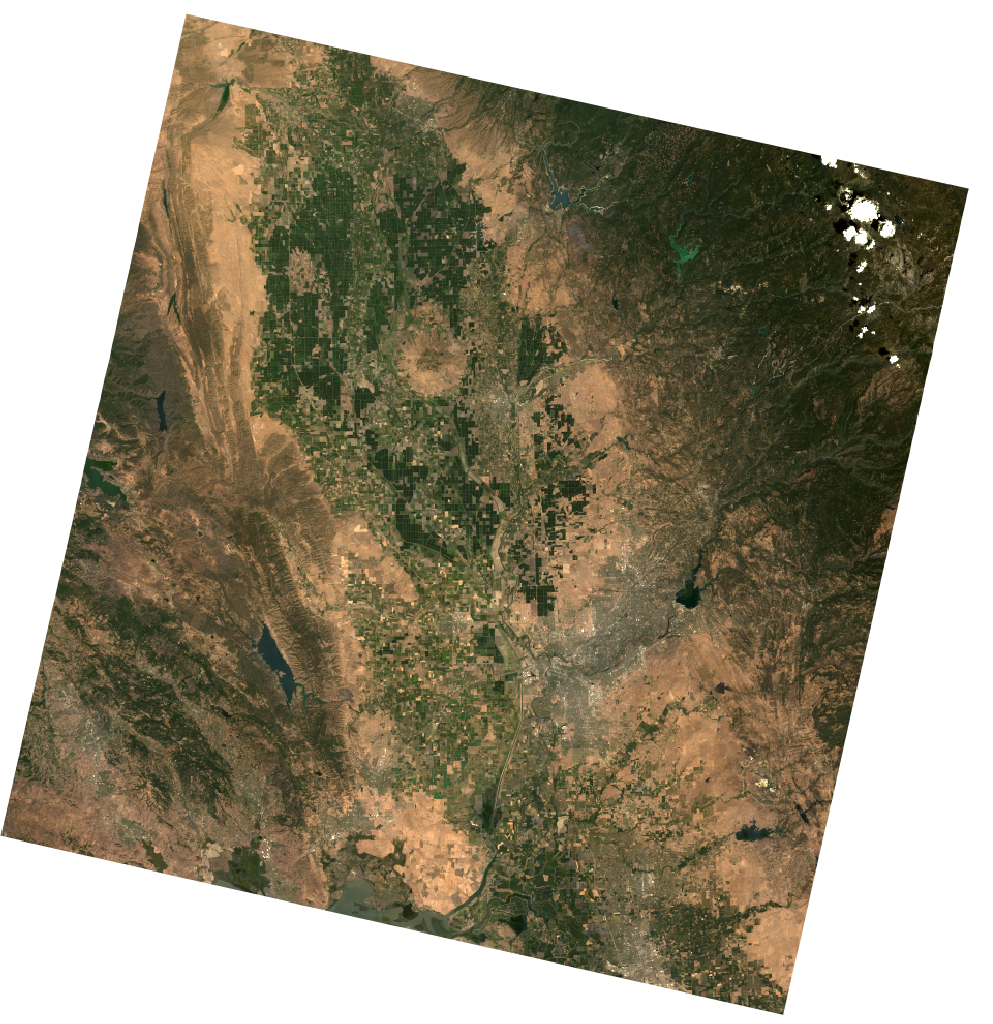

In [6]:
image_url = (
    landsat_img.select(['SR_B4', 'SR_B3', 'SR_B2'])
    .multiply(0.0000275).add(-0.2)
    .getThumbURL({'min': 0.0, 'max': 0.3, 'gamma': 1.25, 'region': region, 'dimensions': image_size})
)
Image(url=image_url, embed=True, format='png')

In [7]:
# Build the DisALEXI object from the Landsat image
model_obj = model.Image.from_landsat_c02_l2(
    landsat_img, 
    ta_source='projects/openet/assets/disalexi/tair/conus_v006_1k',
    #lai_source='openet-landsat-lai',
    lai_source='projects/openet/assets/lai/landsat/c02',
    lst_source='projects/openet/assets/lst/landsat/c02',
    # Drop the  number of iterations from 10 to 1 for the example
    stabil_iterations=1,
    albedo_iterations=1,
    et_reference_source='IDAHO_EPSCOR/GRIDMET', 
    et_reference_band='eto', 
    et_reference_resample='bilinear',
)
# model_obj = disalexi.Image(ee.Image(landsat.LandsatSR(landsat_img).prep())

### NDVI

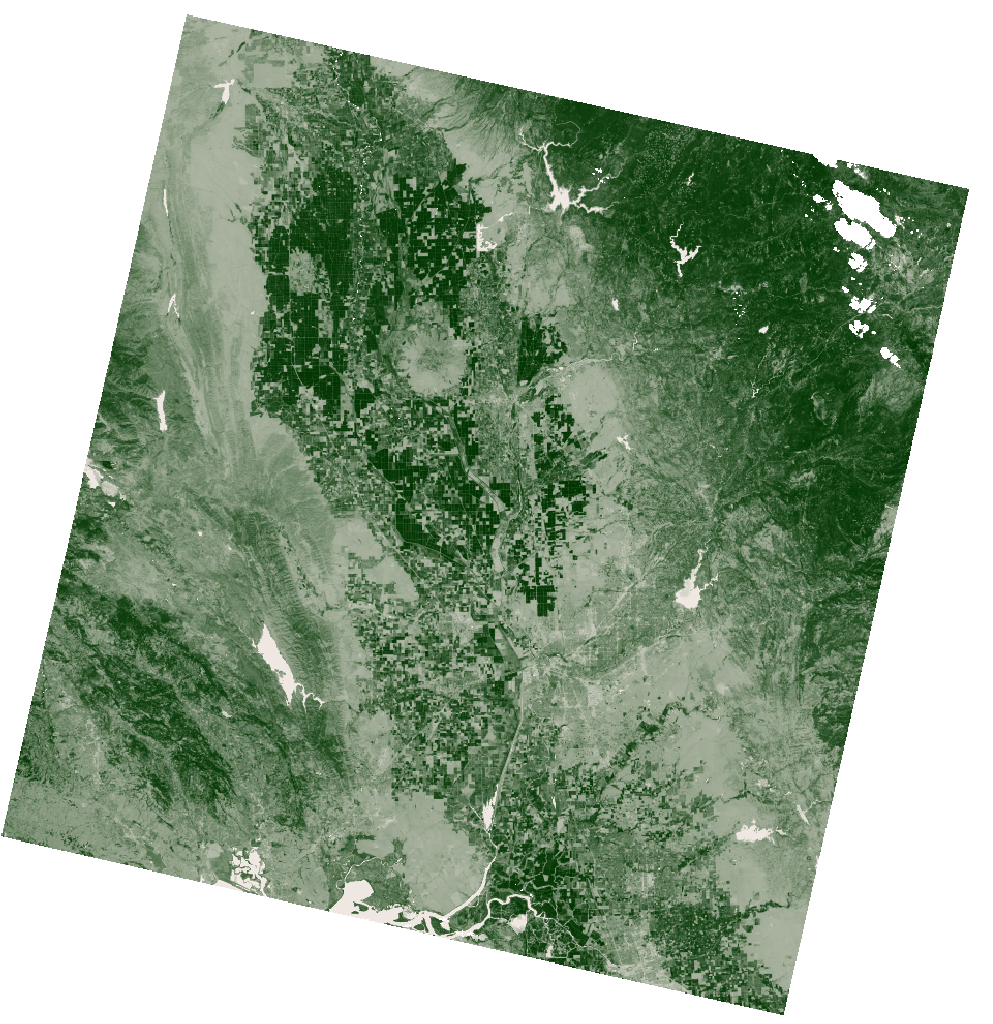

In [8]:
image_url = model_obj.ndvi \
    .getThumbURL({'min': -0.1, 'max': 0.9, 'palette': ndvi_palette, 'region': region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')

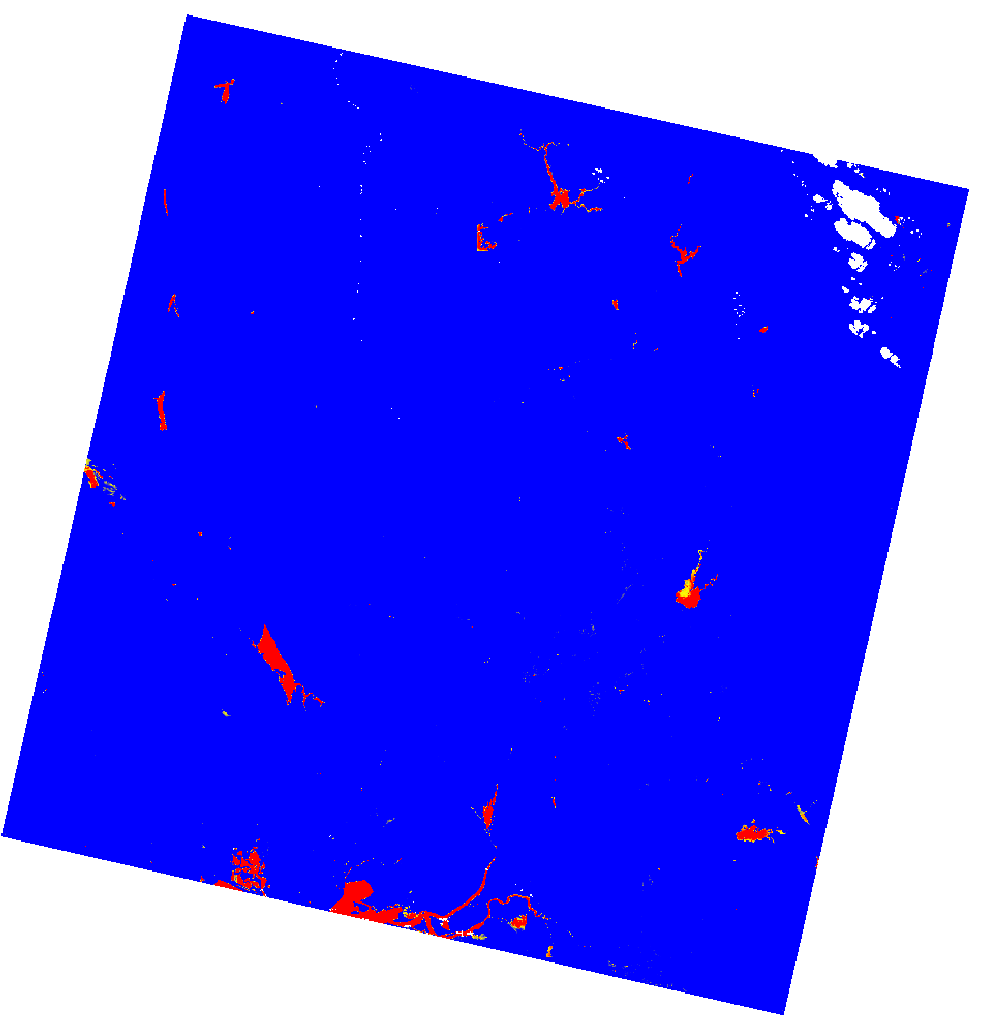

In [9]:
image_url = model_obj.ndvi \
    .getThumbURL({'min': -0.1, 'max': 0.1, 'palette': ['red', 'yellow', 'blue'], 'region': region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')

### LAI

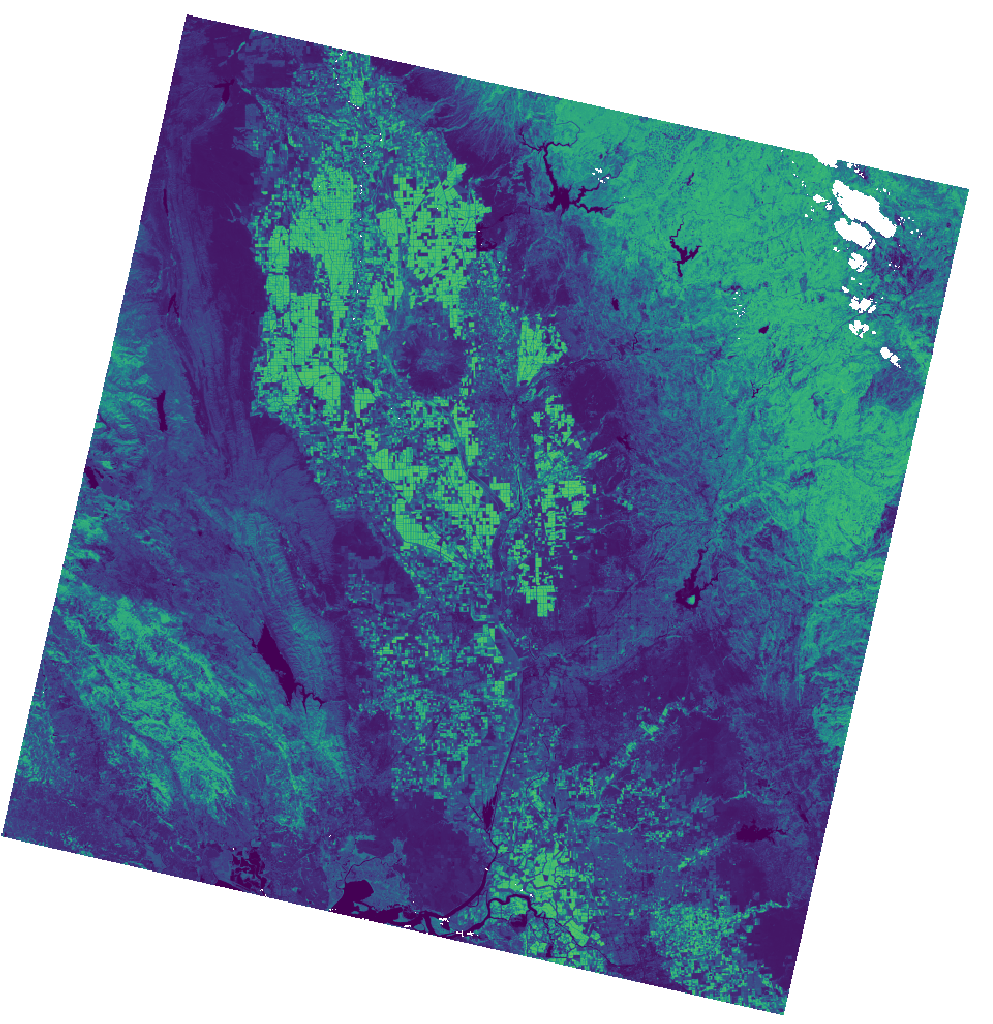

In [10]:
image_url = model_obj.lai \
    .getThumbURL({'min': 0, 'max': 5, 'palette': viridis_palette, 'region': region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')

### Sharpened Thermal

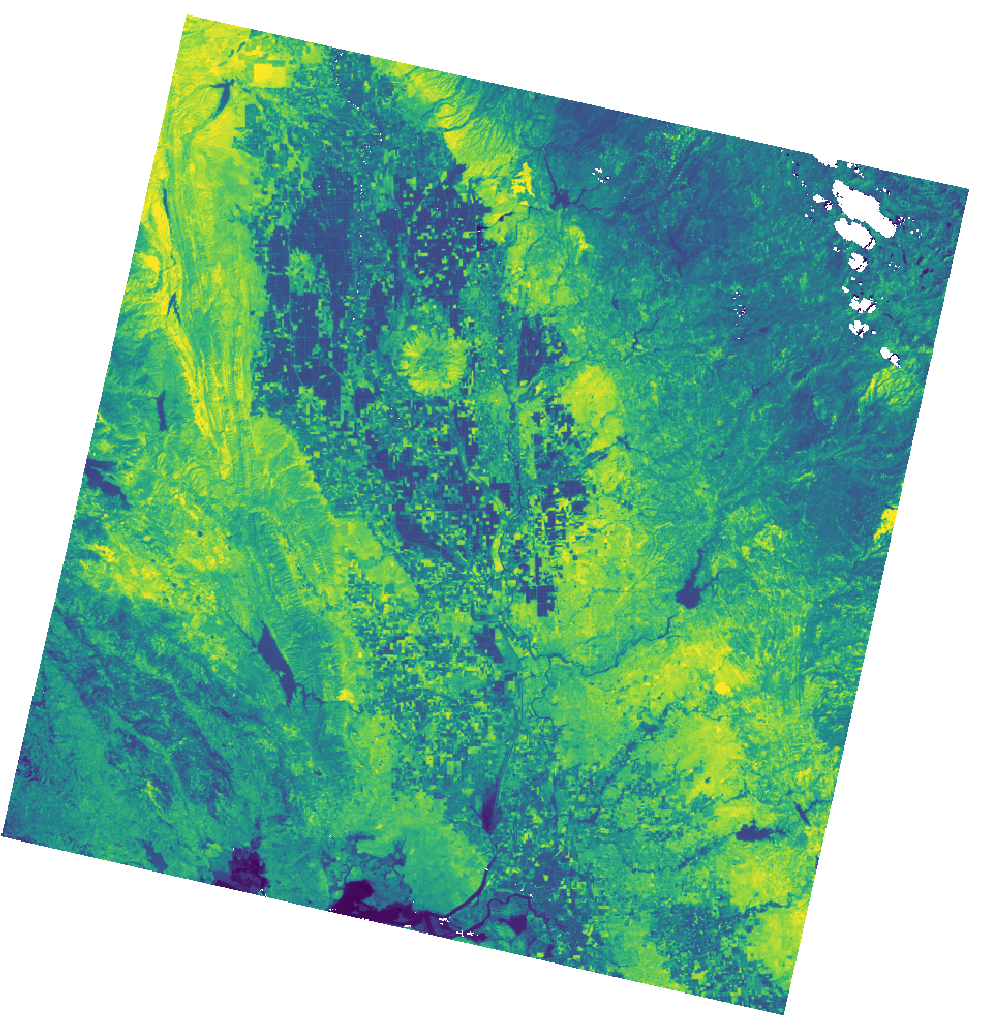

In [11]:
image_url = model_obj.lst \
    .getThumbURL({'min': 295, 'max': 330, 'palette': viridis_palette,  'region': region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')

### Albedo

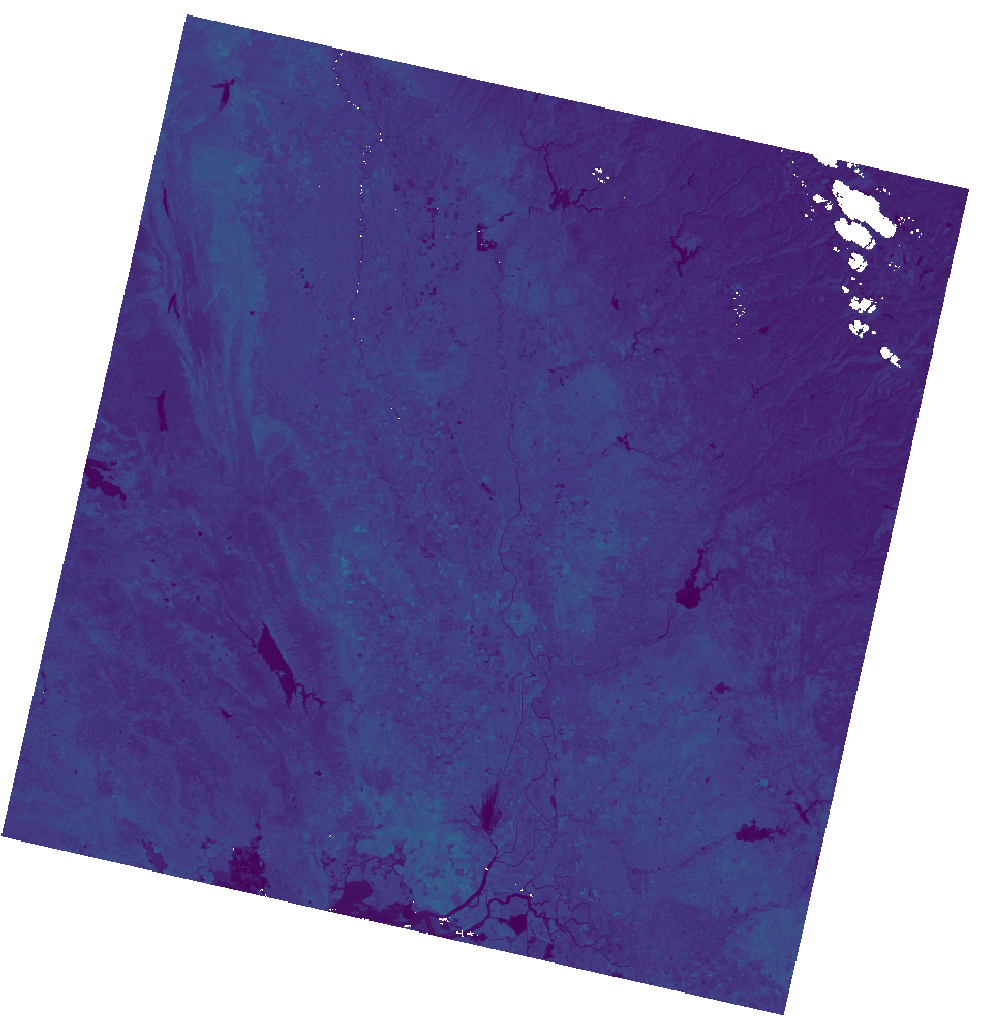

In [12]:
image_url = model_obj.albedo \
    .getThumbURL({'min': 0, 'max': 1, 'palette': viridis_palette, 'region': region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')

### Air Temperature

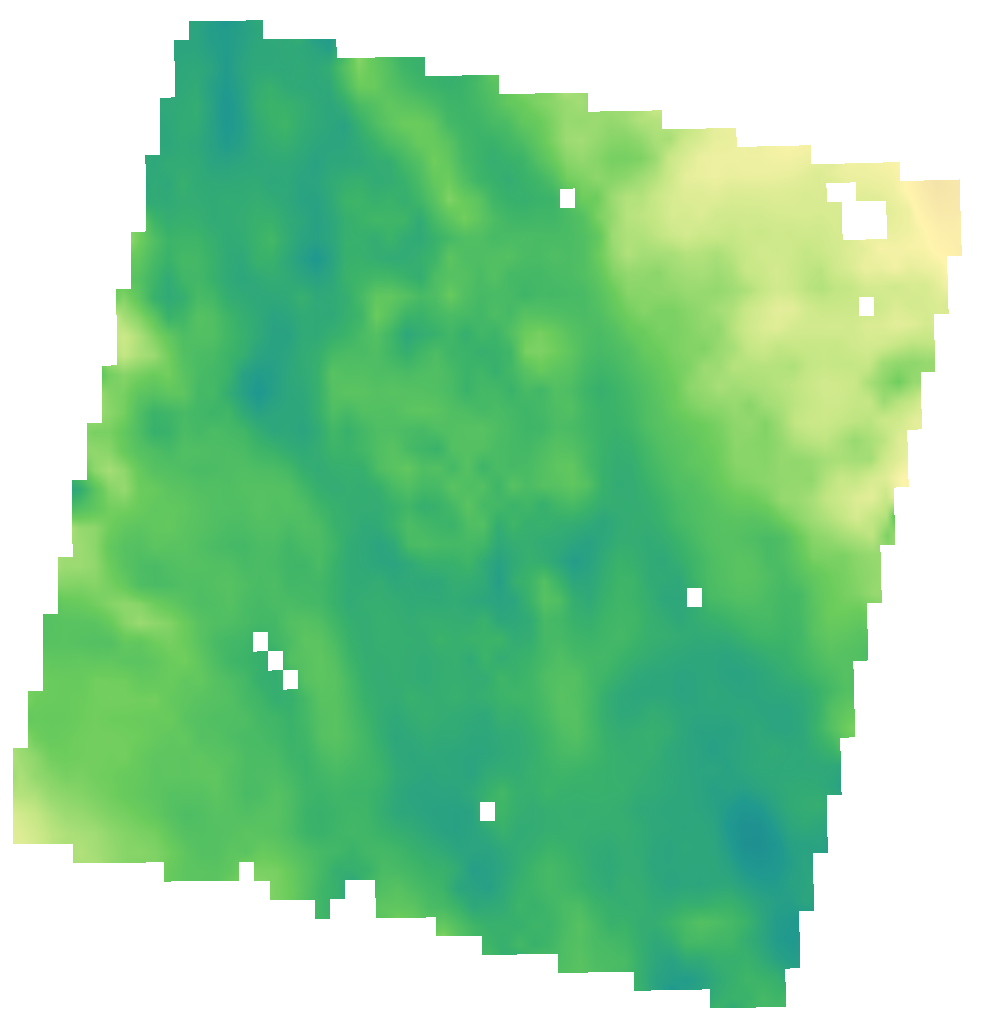

In [13]:
image_url = model_obj.ta \
    .getThumbURL({'min': 270, 'max': 320, 'palette': et_palette, 'region': region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')

### ALEXI ET

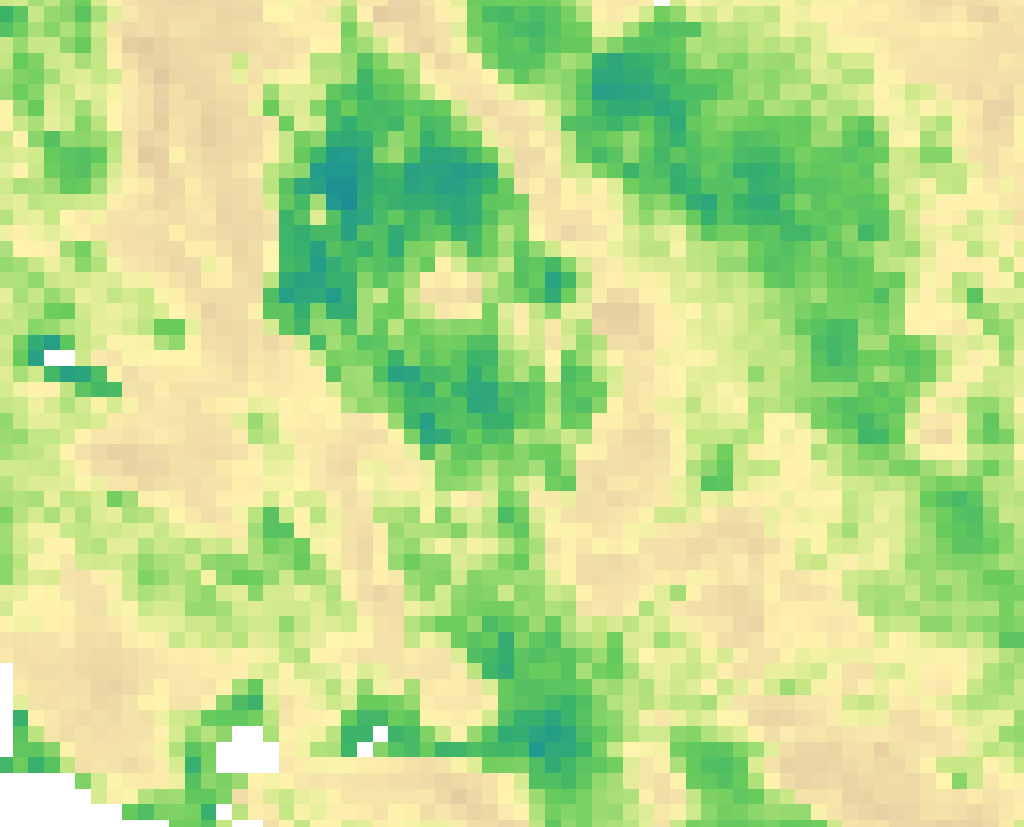

In [14]:
image_url = model_obj.et_alexi \
    .getThumbURL({'min': 0.0, 'max': 10, 'palette': et_palette, 'region': region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')

### ET

In [15]:
# image_url = model_obj.et \
#     .getThumbURL({'min': 0.0, 'max': 10, 'palette': et_palette, 'region': region, 'dimensions': image_size})
# Image(url=image_url, embed=True, format='png')

### Reference ET

In [16]:
# image_url = model_obj.et_reference \
#     .getThumbURL({'min': 0.0, 'max': 12, 'palette': et_palette, 'region': test_region, 'dimensions': image_size})
# Image(url=image_url, embed=True, format='png')

### "Calculate" Method

Return a multiband image of the model variables

In [17]:
# image_url = model_obj.calculate(['et', 'et_reference']).select(['et']) \
#     .getThumbURL({'min': 0.0, 'max': 10, 'palette': et_palette, 
#                   'region': test_region, 'dimensions': image_size})
# Image(url=image_url, embed=True, format='png')

### ET fraction

In [18]:
# image_url = model_obj.et_fraction \
#     .getThumbURL({'min': 0.0, 'max': 1.2, 'palette': et_palette, 
#                   'region': test_region, 'dimensions': image_size})
# Image(url=image_url, embed=True, format='png')